# Introduction

In [1]:
"""
What? Using different scaling for test and training set

Reference: [code] https://github.com/amueller/introduction_to_ml_with_python
           [book] Guido, Sarah, and Andreas Müller. Introduction to machine learning with python. Vol. 282. O'Reilly 
                  Media, 2016.
"""

"\nWhat? Using different scaling for test and training set\n\nReference: [code] https://github.com/amueller/introduction_to_ml_with_python\n           [book] Guido, Sarah, and Andreas Müller. Introduction to machine learning with python. Vol. 282. O'Reilly \n                  Media, 2016.\n"

# Import libraries/modules

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.datasets import make_blobs
rcParams['figure.figsize'] = 14, 5
rcParams['font.size'] = 15
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
# Getting rid of the warning messages
import warnings
warnings.filterwarnings("ignore")

# Make synthetic data

In [3]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# Comparing original, scaled and improper scaled data

## Original data

In [4]:
"""
Plot the training and test sets
"""

'\nPlot the training and test sets\n'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Original Data')

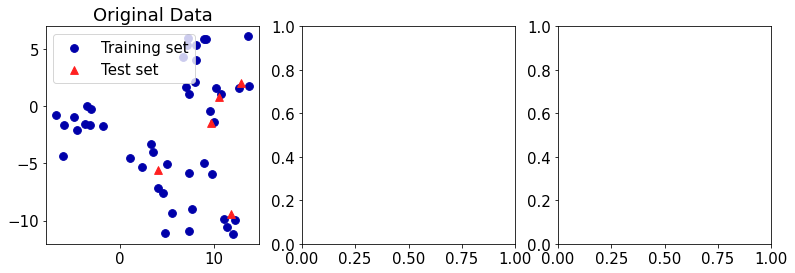

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
cm_cycle = ListedColormap(['#0000aa', '#ff5050', '#50ff50', '#9040a0', '#fff000'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

## Scaled data

In [6]:
"""
Scale the data using MinMaxScaler. It is important to apply exactly the same transformation to the training set 
and the test set for the supervised model to work on the test set.
"""

'\nScale the data using MinMaxScaler. It is important to apply exactly the same transformation to the training set \nand the test set for the supervised model to work on the test set.\n'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


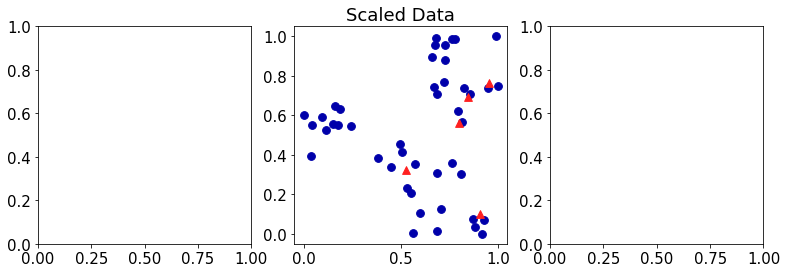

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")
plt.show()

## How to spot the scaling was done correctly

In [8]:
"""
Here, we called fit on the training set, and then called transform on -->>BOTH<<-- the training and test sets. You 
can see that the dataset in the second panel looks identical to the first; -->>ONLY<<-- the ticks on the axes have 
changed. Now all the features are between 0 and 1. 
"""

'\nHere, we called fit on the training set, and then called transform on -->>BOTH<<-- the training and test sets. You \ncan see that the dataset in the second panel looks identical to the first; -->>ONLY<<-- the ticks on the axes have \nchanged. Now all the features are between 0 and 1. \n'

## Wrong scaled data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


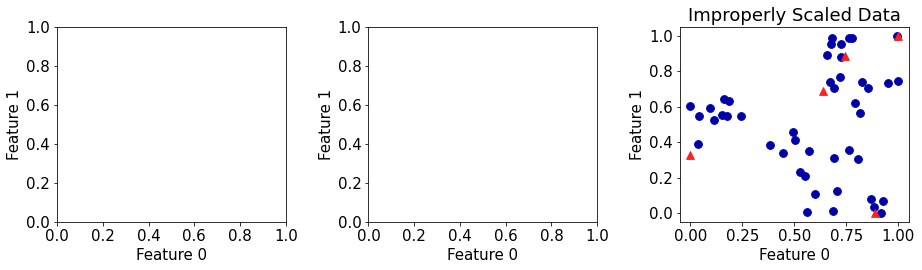

In [9]:
# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

## How to spot the scaling is wrong

In [10]:
"""
The dataset looks different. The test points moved incongruously to the training set, as they were scaled 
differently. We changed the arrangement of the data in an arbitrary way.
"""

'\nThe dataset looks different. The test points moved incongruously to the training set, as they were scaled \ndifferently. We changed the arrangement of the data in an arbitrary way.\n'

# Shortcut

In [11]:
"""
Often, you want to fit a model on some dataset, and then transform it. This is a very common task, which can often
be computed more efficiently than by simply calling fit and then transform. For this use case, all models that have 
a transform method also have a fit_transform method. Here is an example using StandardScaler:
"""

'\nOften, you want to fit a model on some dataset, and then transform it. This is a very common task, which can often\nbe computed more efficiently than by simply calling fit and then transform. For this use case, all models that have \na transform method also have a fit_transform method. Here is an example using StandardScaler:\n'

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining) 
X_scaled = scaler.fit(X).transform(X)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

In [13]:
"""
While fit_transform is not necessarily more efficient for all models, it is still good practice to use this method 
when trying to transform the training set.
"""

'\nWhile fit_transform is not necessarily more efficient for all models, it is still good practice to use this method \nwhen trying to transform the training set.\n'